In [1]:
import scanpy as sc
#import scanpy.external as sce


import scanorama

import os
import numpy as np
from matplotlib.pyplot import rc_context
import pandas as pd

Note: preprocessing should be improved in real use case. Very basic preprocessing below. e.g., add doublet removal, etc

# dedifferentiation

In [2]:
files = os.listdir('dedif_data/')
files = [x for x in files if ('2i' in x or 'Dox' in x) and '_C1_' in x]

In [3]:
def pp(path):
    adata = sc.read_10x_h5(path)
    adata.var_names_make_unique()
    
    sc.pp.filter_cells(adata, min_genes=300)
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .97)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    
    
    adata.obs['Day'] = path.split('/')[1].split('_')[1].replace('D','')
    adata.obs['Sample'] = path.split('/')[1].split('_')[0]
    
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)
    
    return adata

In [4]:
datas = []
for file in files:
    datas.append(pp('dedif_data/' + file))

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_17635/2927225528.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'] = path.split('/')[1].split('_')[1].replace('D','')
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_17635/2927225528.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'] = path.split('/')[1].split('_')[1].replace('D','')
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are 

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_17635/2927225528.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'] = path.split('/')[1].split('_')[1].replace('D','')
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_17635/2927225528.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'] = path.split('/')[1].split('_')[1].replace('D','')
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are 

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_17635/2927225528.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'] = path.split('/')[1].split('_')[1].replace('D','')
/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_17635/2927225528.py:11: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Day'] = path.split('/')[1].split('_')[1].replace('D','')


In [5]:
scanorama.integrate_scanpy(datas)

Found 27998 genes among all datasets
[[0.00000000e+00 3.61031519e-01 2.29226361e-02 ... 4.29799427e-03
  0.00000000e+00 1.43266476e-03]
 [0.00000000e+00 0.00000000e+00 1.73913043e-03 ... 2.83687943e-02
  0.00000000e+00 5.49148819e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.30434783e-02 1.82608696e-02]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.03680664e-03 5.49148819e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 8.32684825e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Processing datasets (5, 24)
Processing datasets (4, 8)
Processing datasets (7, 12)
Processing datasets (38, 39)
Processing datasets (14, 38)
Processing datasets (16, 20)
Processing datasets (3, 6)
Processing datasets (4, 19)
Processing datasets (29, 36)
Processing datasets (0, 22)
Processing datasets (1, 34)
Processing datasets (2, 32)
Processing datasets (6, 2

In [6]:
adata = sc.concat(datas, index_unique='_')

In [7]:
adata

AnnData object with n_obs × n_vars = 90201 × 27998
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'Day', 'Sample'
    obsm: 'X_scanorama'

In [8]:
# Get all the integrated matrices.
scanorama_int = [ad.obsm['X_scanorama'] for ad in datas]

# make into one matrix.
adata.obsm["Scanorama"] = np.concatenate(scanorama_int)

In [9]:
sc.pp.neighbors(adata, use_rep = "Scanorama")
sc.tl.umap(adata)

In [10]:
adata.obs['Day'] = adata.obs['Day'].replace('iPSC', '20').astype('float')

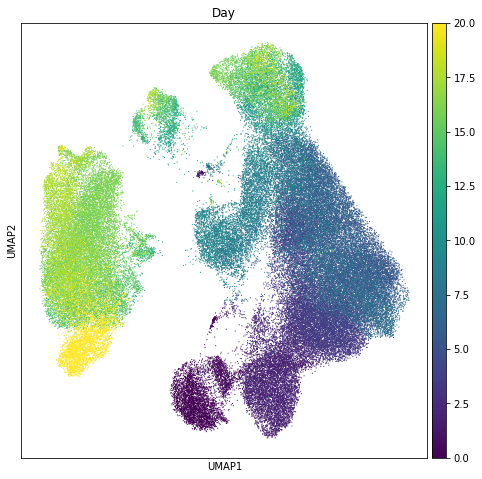

In [11]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = 'Day', s = 5)

In [12]:
adata.write_h5ad('data_saved/scan_dedif.h5ad')

# CD16 removed

In [1]:
import scanpy as sc

import scanorama

import os
import numpy as np
from matplotlib.pyplot import rc_context
import pandas as pd

In [2]:
dirs = os.listdir('pbmc_cd16/')
dirs = [x for x in dirs if 'csv' not in x]
dirs

['MH8919332',
 'MH8919178',
 'MH8919283',
 'MH8919333',
 'MH8919179',
 'MH8919177',
 'MH8919227',
 'MH8919176',
 'MH8919282',
 'MH8919226',
 'newcastle65',
 'newcastle74']

In [5]:
def pp(path):
    adata = sc.read_10x_mtx(path)
    
    sc.pp.filter_cells(adata, min_genes=300)
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .97)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    
    
    adata.obs['Sample'] = path.split('/')[1]
    
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)
    
    return adata

In [6]:
datas = [pp('pbmc_cd16/' + x) for x in dirs]

/tmp/ipykernel_19682/593208951.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_19682/593208951.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_19682/593208951.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_19682/593208951.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_19682/593208951.py:10: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = path.split('/')[1]
/tmp/ipykernel_19682/593208951.py:10: ImplicitModificationWarning: Trying to modify attrib

In [7]:
scanorama.integrate_scanpy(datas)

Found 24929 genes among all datasets
[[0.         0.03264698 0.54402601 0.46098618 0.00677323 0.09180167
  0.         0.01474443 0.07477648 0.         0.0712544  0.13709022]
 [0.         0.         0.01218244 0.23915462 0.52568698 0.64261168
  0.0365651  0.49049803 0.2245352  0.00205973 0.32253145 0.16383283]
 [0.         0.         0.         0.32625167 0.0017828  0.05792833
  0.         0.01539974 0.04011291 0.         0.029119   0.08171148]
 [0.         0.         0.         0.         0.09390681 0.23858616
  0.0033241  0.09436435 0.30260521 0.         0.28707587 0.44055728]
 [0.         0.         0.         0.         0.         0.16445754
  0.32188366 0.40989515 0.06284349 0.00514933 0.1739546  0.08434886]
 [0.         0.         0.         0.         0.         0.
  0.0033241  0.45802651 0.55277369 0.00102987 0.45753559 0.25478645]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00110803 0.95262616 0.00443213 0.00221607]
 [0.         0.     

In [14]:
adata = sc.concat(datas)

In [15]:
adata

AnnData object with n_obs × n_vars = 61728 × 24929
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'Sample'
    obsm: 'X_scanorama'

In [16]:
# Get all the integrated matrices.
scanorama_int = [ad.obsm['X_scanorama'] for ad in datas]

# make into one matrix.
adata.obsm["Scanorama"] = np.concatenate(scanorama_int)

sc.pp.neighbors(adata, use_rep = "Scanorama")
sc.tl.umap(adata)

In [17]:
cells = pd.read_csv('pbmc_cd16/cell_types.csv')
cells = dict(zip(cells.covid_index, cells.initial_clustering))

adata.obs['cell_type'] = adata.obs.index.map(cells)

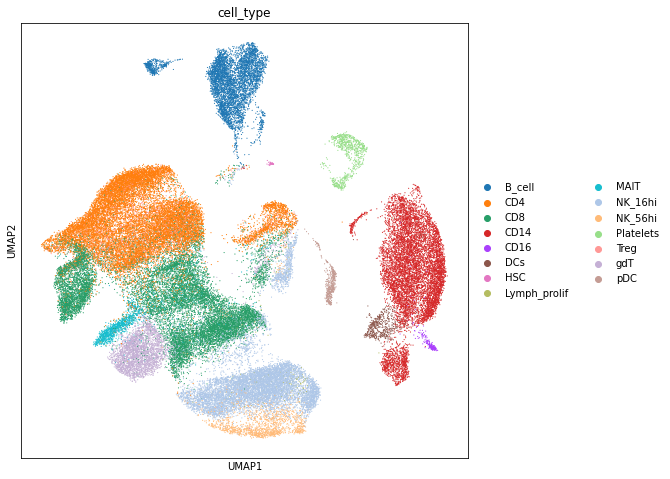

In [18]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = 'cell_type', s = 5)

# Two Datasets

In [1]:
import scanpy as sc

import scanorama

import os
import numpy as np
from matplotlib.pyplot import rc_context
import pandas as pd

In [54]:
def pp(adata, ids):    
    sc.pp.filter_cells(adata, min_genes=300)
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .97)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    
    adata.obs['Sample'] = ids
    if ids == 'lung':
        adata.obs['cell_type'] = 'lung_na'
        
    adata = adata[~adata.obs.cell_type.isna()]
    
    return adata

In [55]:
datas = [pp(sc.read_10x_mtx('two_different/lung/'), 'lung'),
                   pp(sc.read_h5ad('two_different/muscle.h5ad'), 'muscle')]

/tmp/ipykernel_62440/3905731382.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = ids
/tmp/ipykernel_62440/3905731382.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sample'] = ids


In [56]:
scanorama.integrate_scanpy(datas)

Found 32285 genes among all datasets
[[0.         0.18258892]
 [0.         0.        ]]
Processing datasets (0, 1)


In [57]:
adata = sc.concat(datas)

/home/jrlab2019/miniconda3/envs/sc/lib/python3.9/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [58]:
# Get all the integrated matrices.
scanorama_int = [ad.obsm['X_scanorama'] for ad in datas]

# make into one matrix.
adata.obsm["Scanorama"] = np.concatenate(scanorama_int)

sc.pp.neighbors(adata, use_rep = "Scanorama")
sc.tl.umap(adata)

In [59]:
sc.tl.leiden(adata, resolution = 0.5)

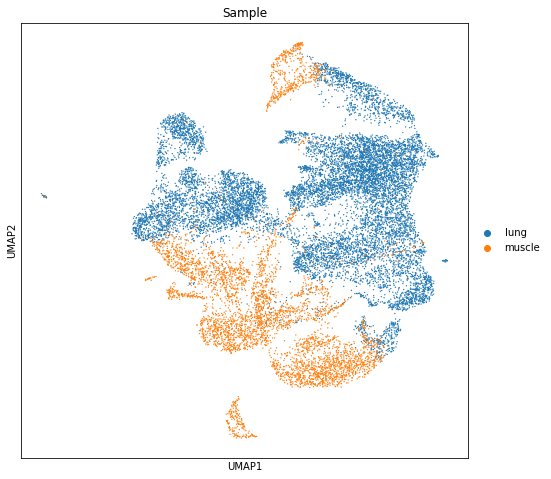

In [60]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = ['Sample'])

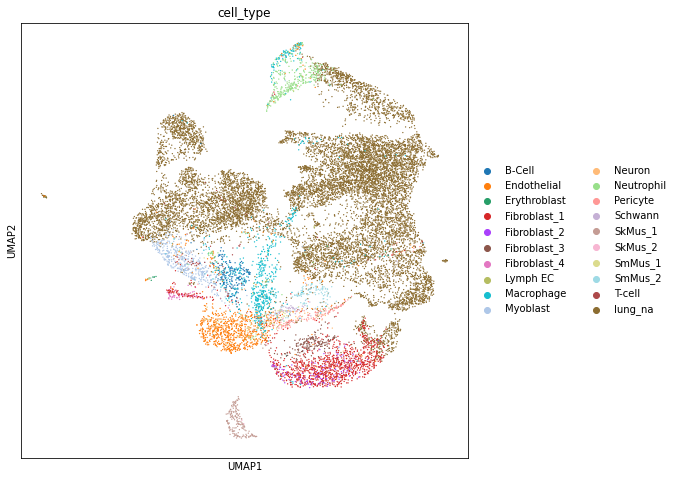

In [61]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = ['cell_type'])

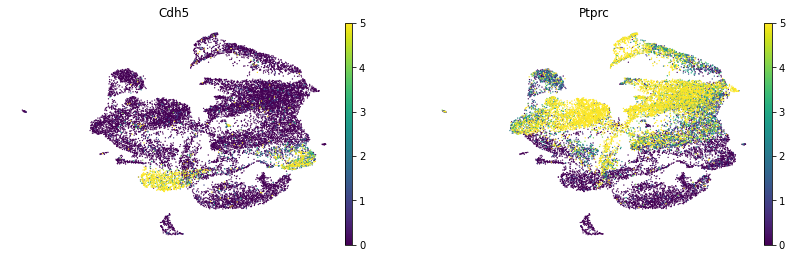

In [68]:
sc.pl.umap(adata, color = ['Cdh5', 'Ptprc'], frameon = False, vmax = 5)

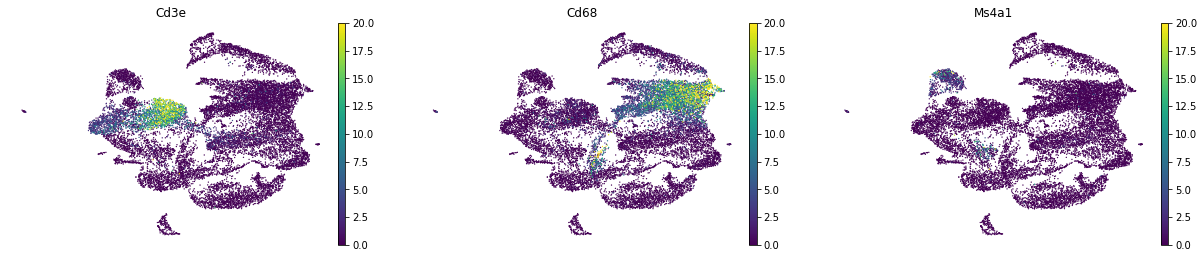

In [65]:
sc.pl.umap(adata, color = ['Cd3e', 'Cd68', 'Ms4a1'], frameon = False, vmax = 20)

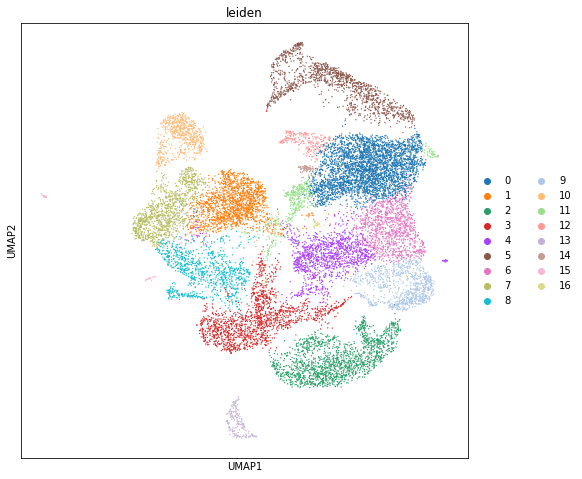

In [66]:
with rc_context({'figure.figsize': (8, 8)}):
    sc.pl.umap(adata, color = ['leiden'])